<h2 align="center">Hotels Data Analysis Project<h2>

In [1]:
# import required libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [2]:
#import or extract the data from the csv file
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
# how many rows and columns?
df_bookings.shape

(134590, 12)

In [5]:
# how many unique room categories?
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
# what are the booking platform we used?
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
# find the total number of bookings per platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

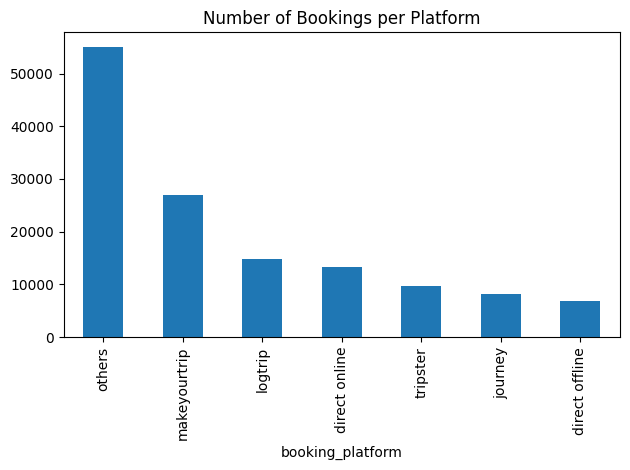

In [8]:
# number of bookings per platform as a bar chart
df_bookings.booking_platform.value_counts().plot(kind="bar")
plt.title('Number of Bookings per Platform')
plt.tight_layout()

In [9]:
# see the key statistics measures of the numerical datas from the dataset
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [10]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [13]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

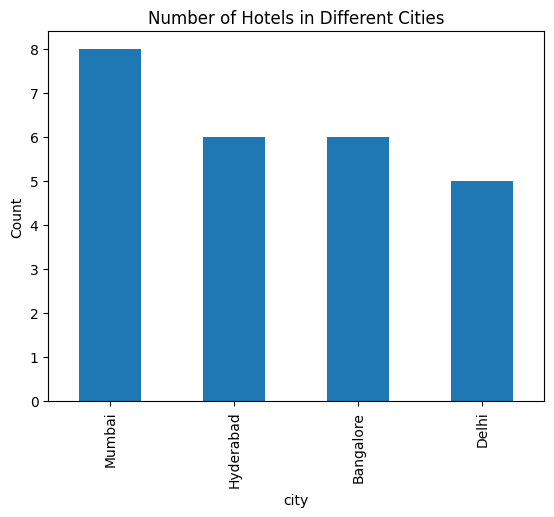

In [14]:
# how many hotel are in different cities
df_hotels.city.value_counts().plot(kind="bar")
plt.title('Number of Hotels in Different Cities')
plt.ylabel('Count')
plt.show()

***
**Explore aggregate bookings**
***

In [15]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Find out unique property ids in aggregate bookings dataset**

In [16]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Find out total bookings per property_id**

In [17]:
df_agg_bookings.property_id.value_counts()

property_id
16559    368
17559    368
17564    368
19561    368
19559    368
18563    368
18562    368
18561    368
18559    368
18558    368
17563    368
17562    368
16563    368
19562    368
16562    368
16561    368
16560    368
17561    368
19560    368
19558    368
17560    368
16558    368
17558    368
19563    368
18560    368
Name: count, dtype: int64

**Find out days on which bookings are greater than capacity**

In [18]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Find out properties that have highest capacity**

In [19]:
df_agg_bookings[df_agg_bookings['capacity'] == df_agg_bookings['capacity'].max()].property_id.unique()

array([17558], dtype=int64)

***
### Data Cleaning
***

In [20]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Clean invalid guests**

In [21]:
# find out how if the records have negative number of guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [22]:
# only use records with number of guest greater than 0
df_bookings = df_bookings[df_bookings.no_guests>0]

In [23]:
df_bookings.shape

(134578, 12)

**Outlier removal in revenue generated**

In [24]:
# find minimum and maximum revenue_generated
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [25]:
# compare the mean and median of the revenue generated
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [26]:
# find the mean and standard deviation of revenue generated
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [27]:
# to remove the outlier, we will find higher limit threshold for revenue generated
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [28]:
# we will find the lower limit threshold for revenue generated
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [29]:
# check if there is reveneue generated less than 0
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [30]:
# find how many records have revenue generated more than the higher limit, these are the outliers
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [31]:
# remove the outliers
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [32]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [33]:
# find out higher limit threshold for revenue realized
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [34]:
# check how many records greater than the higher limit, and check if they are outliers
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [35]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [36]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [37]:
# check how many records are null values
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [38]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [39]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].mean())
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [40]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [41]:
df_agg_bookings = df_agg_bookings[df_agg_bookings['successful_bookings']<df_agg_bookings['capacity']]

In [42]:
df_agg_bookings.shape

(9082, 5)

***
### Data Transformation
***

**Create occupancy percentage column**

In [43]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [44]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [45]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [46]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [47]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [48]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9082 non-null   int64  
 1   check_in_date        9082 non-null   object 
 2   room_category        9082 non-null   object 
 3   successful_bookings  9082 non-null   int64  
 4   capacity             9082 non-null   float64
 5   occ_pct              9082 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 496.7+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### Insights Generation
***

**What is an average occupancy rate in each of the room categories?**

In [49]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [50]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.778651
RT2    57.752486
RT3    57.604256
RT4    58.017915
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [51]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [52]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [53]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           57.752486
Premium         57.604256
Presidential    58.017915
Standard        57.778651
Name: occ_pct, dtype: float64

In [54]:
# show the average occupancy percentage of standard room
df[df.room_class=="Standard"].occ_pct.mean()

57.77865065502183

**Print average occupancy rate per city**

In [55]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [56]:
# join df_hotels dataframe to get the city name
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [57]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.033283
Delhi        60.629588
Hyderabad    57.795562
Mumbai       57.343392
Name: occ_pct, dtype: float64

**When was the occupancy better? Weekday or Weekend?**

In [58]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [59]:
# join df_date dataframe to get the day_type
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [60]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.86
weekend     71.33
Name: occ_pct, dtype: float64

**In the month of June, what is the occupancy for different cities**

In [61]:
# create a new dataframe to store the records for Jun 2022
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2177,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2178,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2179,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2180,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [62]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.65
Hyderabad    58.21
Mumbai       57.82
Bangalore    56.00
Name: occ_pct, dtype: float64

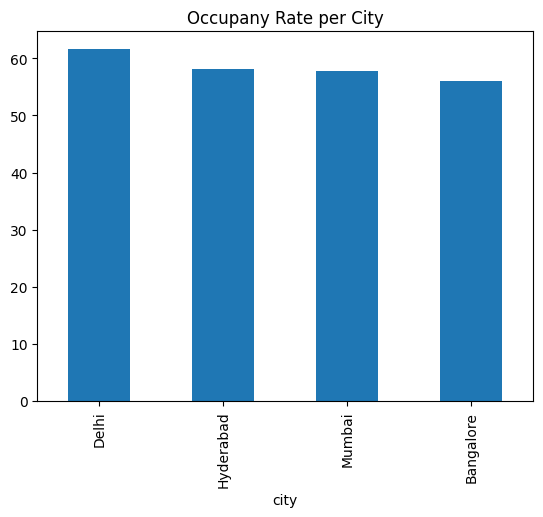

In [63]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")
plt.title('Occupany Rate per City')
plt.show()

**We got new data for the month of august. Append that to existing data**

In [64]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [65]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [66]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [67]:
df_august.shape

(7, 13)

In [68]:
df.shape

(6428, 14)

In [69]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6425,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6426,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6427,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6428,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6429,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6430,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6431,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6432,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6433,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6434,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [70]:
latest_df.shape

(6435, 15)

**Print revenue realized per city**

In [71]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [72]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [73]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [74]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

In [75]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [76]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [77]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [78]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [79]:
df_date['date'].unique()

array(['01-May-22', '02-May-22', '03-May-22', '04-May-22', '05-May-22',
       '06-May-22', '07-May-22', '08-May-22', '09-May-22', '10-May-22',
       '11-May-22', '12-May-22', '13-May-22', '14-May-22', '15-May-22',
       '16-May-22', '17-May-22', '18-May-22', '19-May-22', '20-May-22',
       '21-May-22', '22-May-22', '23-May-22', '24-May-22', '25-May-22',
       '26-May-22', '27-May-22', '28-May-22', '29-May-22', '30-May-22',
       '31-May-22', '01-Jun-22', '02-Jun-22', '03-Jun-22', '04-Jun-22',
       '05-Jun-22', '06-Jun-22', '07-Jun-22', '08-Jun-22', '09-Jun-22',
       '10-Jun-22', '11-Jun-22', '12-Jun-22', '13-Jun-22', '14-Jun-22',
       '15-Jun-22', '16-Jun-22', '17-Jun-22', '18-Jun-22', '19-Jun-22',
       '20-Jun-22', '21-Jun-22', '22-Jun-22', '23-Jun-22', '24-Jun-22',
       '25-Jun-22', '26-Jun-22', '27-Jun-22', '28-Jun-22', '29-Jun-22',
       '30-Jun-22', '01-Jul-22', '02-Jul-22', '03-Jul-22', '04-Jul-22',
       '05-Jul-22', '06-Jul-22', '07-Jul-22', '08-Jul-22', '09-J

In [80]:
df_date["date"] = pd.to_datetime(df_date["date"],dayfirst=True,format="mixed")
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [81]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [82]:
df_bookings_all['check_in_date'] = df_bookings_all['check_in_date'].str.replace('-','/')
df_bookings_all['check_in_date'].tail()

134568    31/07/22
134569    31/07/22
134570    31/07/22
134571    31/07/22
134572    31/07/22
Name: check_in_date, dtype: object

In [83]:
df_bookings_all['check_in_date'].unique()

array(['1/5/2022', '2/5/2022', '3/5/2022', '4/5/2022', '5/5/2022',
       '6/5/2022', '7/5/2022', '8/5/2022', '9/5/2022', '10/5/2022',
       '11/5/2022', '12/5/2022', '13/05/22', '14/05/22', '15/05/22',
       '16/05/22', '17/05/22', '18/05/22', '19/05/22', '20/05/22',
       '21/05/22', '22/05/22', '23/05/22', '24/05/22', '25/05/22',
       '26/05/22', '27/05/22', '28/05/22', '29/05/22', '30/05/22',
       '31/05/22', '1/6/2022', '2/6/2022', '3/6/2022', '4/6/2022',
       '5/6/2022', '6/6/2022', '7/6/2022', '8/6/2022', '9/6/2022',
       '10/6/2022', '11/6/2022', '12/6/2022', '13/06/22', '14/06/22',
       '15/06/22', '16/06/22', '17/06/22', '18/06/22', '19/06/22',
       '20/06/22', '21/06/22', '22/06/22', '23/06/22', '24/06/22',
       '25/06/22', '26/06/22', '27/06/22', '28/06/22', '29/06/22',
       '30/06/22', '1/7/2022', '2/7/2022', '3/7/2022', '4/7/2022',
       '5/7/2022', '6/7/2022', '7/7/2022', '8/7/2022', '9/7/2022',
       '10/7/2022', '11/7/2022', '12/7/2022', '13/07/22'

In [84]:
# convert check_in_date string to datetime, which has day first and mixed format.
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all['check_in_date'],dayfirst=True,format="mixed")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [85]:
# join df_date to get the month and year data
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [86]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

**Print revenue realized per hotel type**

In [87]:
df_bookings_all.groupby('category')['revenue_realized'].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

In [88]:
df_bookings_all.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

**Print average rating per city**

In [89]:
df_bookings_all.groupby('city')['ratings_given'].mean()

city
Bangalore    3.407681
Delhi        3.779298
Hyderabad    3.661041
Mumbai       3.650545
Name: ratings_given, dtype: float64

**Print a pie chart of revenue realized per booking platform**

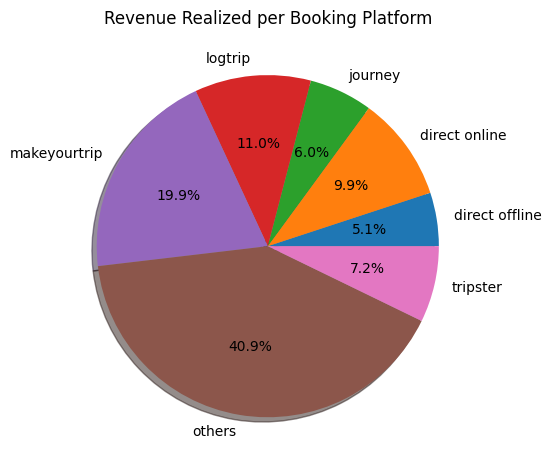

In [90]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot.pie(legend=False,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('Revenue Realized per Booking Platform')
plt.ylabel('')
plt.tight_layout()